# Tutorial for selectionfunctions python module

In [1]:
# Imports custom to how you run your notebook.
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi']= 150

## Downloading the data files

In [2]:
# Set the directory to where you want to store the large data files
from selectionfunctions.config import config
config['data_dir'] = '/Users/douglasboubert/Science/selectionfunctions/selectionfunctions/data'

In [3]:
import selectionfunctions.boubert_everall_2019
selectionfunctions.boubert_everall_2019.fetch()

Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.


## Simple query

In [4]:
from selectionfunctions.boubert_everall_2019 import BoubertEverall2019Query
from selectionfunctions.source_base import Source

boubert_everall_2019 = BoubertEverall2019Query()

Loading auxilliary data ...
Loading selection function ...
Creating selection function interpolator...
t = 0.075 s
  auxilliary:   0.073 s
          sf:   0.002 s
interpolator:   0.001 s


In [6]:
c = Source(
        '05h00m00.00000s',
        '+30d00m00.0000s',
        photometry={'gaia_g':20},
        frame='icrs')
print(boubert_everall_2019(c))

Gaia G magnitude was passed.
0.9999999964859277


## Large query to create a map

Loading Boubert & Everall 2019 selection function...
Loading auxilliary data ...
Loading selection function ...
Creating selection function interpolator...
t = 0.069 s
  auxilliary:   0.067 s
          sf:   0.002 s
interpolator:   0.000 s
Creating grid of coordinates...
Querying map...
Gaia G magnitude was passed.
Querying map...
Gaia G magnitude was passed.
Querying map...
Gaia G magnitude was passed.
Saving image...


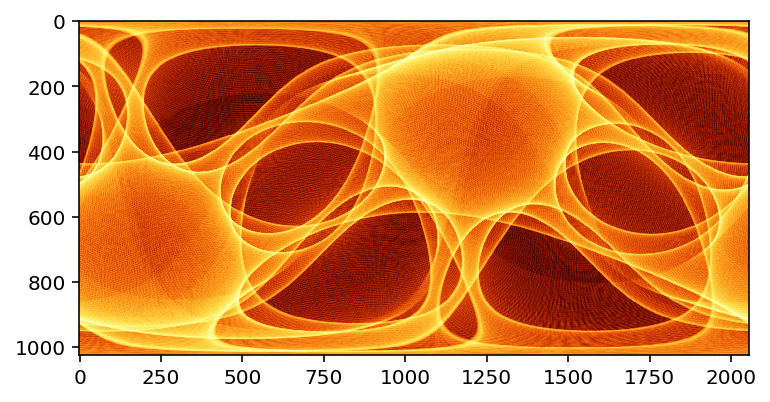

In [7]:
import PIL.Image
import astropy.units as u

def numpy2pil(a, vmin, vmax):
    a = np.clip((a - vmin) / (vmax - vmin), 0., 1.)
    a = (254.99 * a).astype('u1')
    return PIL.Image.fromarray(a)

w,h = (2056,1024)
l_0 = 130.

# Set up Bayestar query object
print('Loading Boubert & Everall 2019 selection function...')
boubert_everall_2019 = BoubertEverall2019Query()

# Create a grid of coordinates
print('Creating grid of coordinates...')
l = np.linspace(-180.+l_0, 180.+l_0, 2*w)
b = np.linspace(-90., 90., 2*h+2)
b = b[1:-1]
l,b = np.meshgrid(l, b)

l += (np.random.random(l.shape) - 0.5) * 360./(2.*w)
b += (np.random.random(l.shape) - 0.5) * 180./(2.*h)

sf = np.empty(l.shape+(3,), dtype='f8')

for k,G in enumerate([21.0, 21.2, 21.4]):
    # d = 5.    # We'll query integrated reddening to a distance of 5 kpc
    sources = Source(l*u.deg, b*u.deg, photometry={'gaia_g':G*np.ones(l.shape)}, frame='galactic')

    # Get the dust median reddening at each coordinate
    print('Querying map...')
    sf[:,:,k] = boubert_everall_2019.query(sources)

# Convert the output array to a PIL image and save
print('Saving image...')
img = numpy2pil(sf[::-1,::-1,:], 0., 1)
img = img.resize((w,h), resample=PIL.Image.LANCZOS)

plt.imshow(img)